# 데이터 전처리 하기

In [1]:
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

data_path = '/home/restful3/datasets/torch'

train_data = CIFAR10(
    root = data_path,
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = CIFAR10(
    root = data_path,
    train=False,
    download=True,
    transform=ToTensor()
)

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


Files already downloaded and verified
Files already downloaded and verified


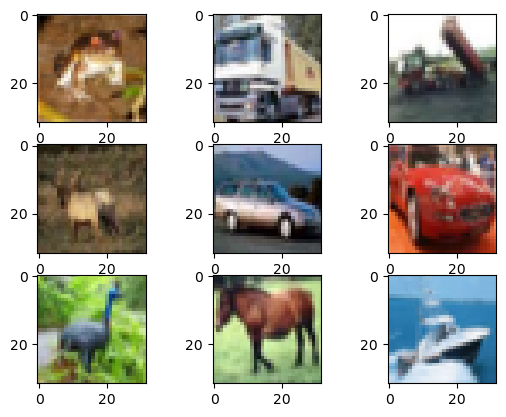

In [2]:
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(train_data.data[i])
plt.show()

## 데이터 증강

In [3]:
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

import torchvision.transforms as T
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4),
    RandomHorizontalFlip(p=0.5)
])


data_path = '/home/restful3/datasets/torch'

train_data = CIFAR10(
    root = data_path,
    train=True,
    download=True,
    transform=transforms
)

test_data = CIFAR10(
    root = data_path,
    train=False,
    download=True,
    transform=transforms
)

Files already downloaded and verified
Files already downloaded and verified


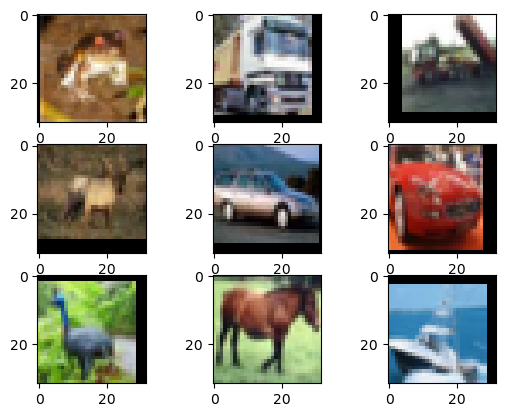

In [4]:
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(transforms(train_data.data[i]))
plt.show()

## 이미지 정규화

In [5]:
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

import torchvision.transforms as T
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.247, 0.243, 0.261)
    ),
    T.ToPILImage()    
])


data_path = '/home/restful3/datasets/torch'

train_data = CIFAR10(
    root = data_path,
    train=True,
    download=True,
    transform=transforms
)

test_data = CIFAR10(
    root = data_path,
    train=False,
    download=True,
    transform=transforms
)

Files already downloaded and verified
Files already downloaded and verified


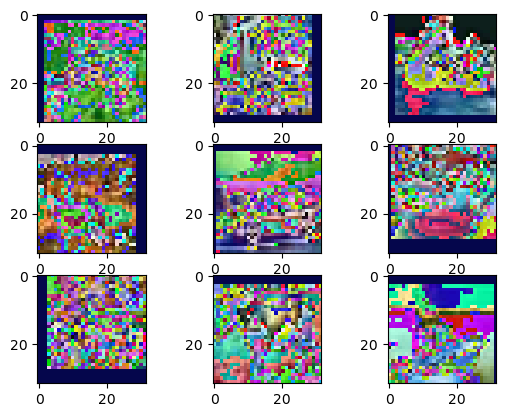

In [6]:
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(transforms(train_data.data[i]))
plt.show()

# CNN으로 이미지 분류하기

## 기본 블록 정의하기

In [7]:
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, hidden_dim):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, hidden_dim,
                              kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(hidden_dim, out_channels,
                              kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        return x

## CNN 모델 정의하기

- 일반적으로 이미지를 다룰 때, 배치 차원을 유지하고 픽셀 차원을 평탄화하여 선형 레이어에 입력으로 사용합니다. 이미지의 차원은 보통 [배치 크기, 채널 수, 높이, 너비]와 같은 형태를 가지며, 선형 레이어에 입력하기 위해서는 [배치 크기, 특징량] 형태로 평탄화되어야 합니다.

- 따라서 start_dim=1은 픽셀 차원을 평탄화할 때, 1번째 차원부터 시작하여 평탄화하는 것을 의미합니다. 즉, x 텐서의 크기가 [배치 크기, 채널 수, 높이, 너비]인 경우, start_dim=1을 사용하면 [배치 크기, 채널 수 * 높이 * 너비] 형태로 평탄화됩니다.

- 아래 코드에서 x = torch.flatten(x, start_dim=1)은 x 텐서를 평탄화하여 1차원으로 만든 후에 이를 선형 레이어에 입력으로 사용하기 위한 작업을 수행하는 것입니다.

In [8]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        
        self.block1 = BasicBlock(in_channels=3, out_channels=32, hidden_dim=16)
        self.block2 = BasicBlock(in_channels=32, out_channels=128, hidden_dim=64)
        self.block3 = BasicBlock(in_channels=128, out_channels=256, hidden_dim=128)        
        
        self.fc1 = nn.Linear(in_features=4096, out_features=2048) # BasicBlock을 거칠 때 마다, 이미지 크기가 반으로 
        self.fc2 = nn.Linear(in_features=2048, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=num_classes)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = torch.flatten(x, start_dim=1)
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x

## 모델 학습하기

In [9]:
from torch.utils.data.dataloader import DataLoader
from torch.optim.adam import Adam

import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

import torchvision.transforms as T
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

train_transforms = Compose([
    RandomCrop((32, 32), padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.247, 0.243, 0.261)
    )
])

test_transforms = Compose([
    T.ToTensor(),
    Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.247, 0.243, 0.261)
    )
])


data_path = '/home/restful3/datasets/torch'

train_data = CIFAR10(
    root = data_path,
    train=True,
    download=True,
    transform=train_transforms
)

test_data = CIFAR10(
    root = data_path,
    train=False,
    download=True,
    transform=test_transforms
)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

device = 'cuda'if torch.cuda.is_available() else 'cpu'
print(device)

model = CNN(num_classes=10)

model.to(device)

Files already downloaded and verified
Files already downloaded and verified
cuda


CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=256,

In [10]:
lr = 1e-3

optim = Adam(model.parameters(), lr=lr)

for epoch in range(100):
    for data, label in train_loader:
        data = data.to(device)
        label = label.to(device)
        
        optim.zero_grad()
        
        preds = model(data)
        
        loss = nn.CrossEntropyLoss()(preds, label)
        loss.backward()
        optim.step()
        
    if epoch == 0 or epoch%10 == 9:
        print(f'epoch : {epoch} loss : {loss.item()}')
        
torch.save(model.state_dict(), './models/CIFAR.pth')        

epoch : 0 loss : 1.2151336669921875
epoch : 9 loss : 0.3888109028339386
epoch : 19 loss : 0.1203424334526062
epoch : 29 loss : 0.633023202419281
epoch : 39 loss : 0.2696083188056946
epoch : 49 loss : 0.2107158750295639
epoch : 59 loss : 0.4146184027194977
epoch : 69 loss : 0.7885507941246033
epoch : 79 loss : 0.09918166697025299
epoch : 89 loss : 0.2970349192619324
epoch : 99 loss : 0.37510809302330017


## 모델 성능 평가하기

In [16]:
model.load_state_dict(torch.load('./models/CIFAR.pth', map_location=device))

num_corr = 0

with torch.no_grad():
    for data, label in test_loader:
        data = data.to(device)
        label = label.to(device)
        
        output = model(data)
        preds = output.data.max(1)[1]
        corr = preds.eq(label.data).sum().item()
        num_corr += corr
        
    print(f'Accuracy : {num_corr/len(test_data)}')

Accuracy : 0.8373


# 전이 학습 모델 VGG로 분류하기

## 사전 학습된 모델 불러오기

In [2]:
import torch
import torch.nn as nn
from torchvision.models import vgg16
data_path = '/home/restful3/datasets/torch'
device = 'cuda'if torch.cuda.is_available() else 'cpu'
print(device)

model = vgg16(pretrained=True)
fc = nn.Sequential(
    nn.Linear(512*7*7, 4096),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(4096, 10)
)

model.classifier = fc
model.to(device)

cuda


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 모델 학습하기

In [8]:
import tqdm

from torch.utils.data.dataloader import DataLoader
from torch.optim.adam import Adam

import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
import torchvision.transforms as T
from torchvision.transforms import Compose, ToTensor, Resize
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize


train_transforms = Compose([
    Resize(224),
    RandomCrop((224, 224), padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.247, 0.243, 0.261)
    )
])

test_transforms = Compose([
    Resize(224),
    T.ToTensor(),
    Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.247, 0.243, 0.261)
    )
])

train_data = CIFAR10(
    root = data_path,
    train=True,
    download=True,
    transform=train_transforms
)

test_data = CIFAR10(
    root = data_path,
    train=False,
    download=True,
    transform=test_transforms
)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
lr = 1e-2

optim = Adam(model.parameters(), lr=lr)

for epoch in range(30):
    iterator = tqdm.tqdm(train_loader)
    for data, label in iterator:
        data = data.to(device)
        label = label.to(device)
        
        optim.zero_grad()
        
        preds = model(data)
        
        loss = nn.CrossEntropyLoss()(preds, label)
        loss.backward()
        optim.step()
        
        iterator.set_description(f'epoch : {epoch+1} loss : {loss.item()}')

        
torch.save(model.state_dict(), './models/CIFAR_pretrained.pth')        

epoch : 6 loss : 2.295328378677368:  22%|▉   | 349/1563 [00:57<03:20,  6.06it/s]

## 모델 성능 평가하기

In [ ]:
model.load_state_dict(torch.load('./models/CIFAR_pretrained.pth', map_location=device))

num_corr = 0

with torch.no_grad():
    for data, label in test_loader:
        data = data.to(device)
        label = label.to(device)
        
        output = model(data)
        preds = output.data.max(1)[1]
        corr = preds.eq(label.data).sum().item()
        num_corr += corr
        
    print(f'Accuracy : {num_corr/len(test_data)}')